In [37]:
import numpy as np
import pandas as pd

In [38]:
data = pd.read_csv('datasets/risk_dataset_2.csv', header=None )
data.columns = ['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 
              'lastmamm', 'surgmeno', 'hrt', 'invasive', 'cancer', 'training', 'count']

In [40]:
data = data.drop(columns=['invasive','training','count'])
data

,menopaus,age_grp,density,race,hispanic,bmi,age_first,nrelbc,brstproc,lastmamm,surgmeno,hrt,cancer
0,0,1,1,1,0,1,0,0,0,0,9,9,0
1,0,1,1,1,0,1,0,0,0,9,9,9,0
2,0,1,1,1,0,1,0,0,0,9,9,9,0
3,0,1,1,1,0,1,1,0,0,0,9,9,0
4,0,1,1,1,0,1,1,0,1,9,9,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181898,9,4,9,9,9,9,9,9,9,1,9,9,0
181899,9,4,9,9,9,9,9,9,9,9,9,9,0
181900,9,4,9,9,9,9,9,9,9,9,9,9,0
181901,9,4,9,9,9,9,9,9,9,9,9,9,1


In [41]:
#replace unknowns with null
cols = ['menopaus', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 
        'brstproc', 'lastmamm', 'surgmeno', 'hrt']
data[cols] = data[cols].replace({9:np.nan})
#remove rows that have less than 3 known feature with exception of invasive, count, cancer & training
data = data[data.isnull().sum(axis=1) < 9]

In [43]:
X = data[['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt']]
y = data['cancer']

In [48]:
#KNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)


In [49]:
#convert back to ints
X[['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt']] = X[['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt']].astype(int)
#one hot encode race
X = pd.get_dummies(X, columns=["race"], drop_first=True)

In [50]:
X['surgmeno'].value_counts()

0    139107
1     41998
Name: surgmeno, dtype: int64

In [51]:
X['hrt'].value_counts()

0    127505
1     53600
Name: hrt, dtype: int64

In [52]:
#K-Fold for LR and GB
#Neural network
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 144884, Test set:36221
Fold:2, Train set: 144884, Test set:36221
Fold:3, Train set: 144884, Test set:36221
Fold:4, Train set: 144884, Test set:36221
Fold:5, Train set: 144884, Test set:36221


In [55]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall'}


clf = LogisticRegression()
scores = cross_validate(clf, X, y, scoring=scoring,
                         cv=5, return_train_score=True)
print(scores.keys())
print(scores['test_acc']) 

/Users/olohireme/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/olohireme/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/olohireme/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/olohireme/miniforge3/envs/mlp/lib/python3.8/s

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec', 'train_prec', 'test_rec', 'train_rec'])
[0.96579332 0.96579332 0.96579332 0.96579332 0.96576572]


/Users/olohireme/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/olohireme/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
scores

{'fit_time': array([0.384588  , 0.28637075, 0.27697086, 0.1956017 , 0.32422805]),
 'score_time': array([0.01399803, 0.01117516, 0.01198387, 0.01141214, 0.0112431 ]),
 'test_acc': array([0.96579332, 0.96579332, 0.96579332, 0.96579332, 0.96576572]),
 'train_acc': array([0.96578642, 0.96578642, 0.96578642, 0.96578642, 0.96579332]),
 'test_prec': array([0., 0., 0., 0., 0.]),
 'train_prec': array([0., 0., 0., 0., 0.]),
 'test_rec': array([0., 0., 0., 0., 0.]),
 'train_rec': array([0., 0., 0., 0., 0.])}

In [57]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, Input


Init Plugin
Init Graph Optimizer
Init Kernel


In [61]:
#split into train and test
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# randomly oversample minority
sm = SMOTE(sampling_strategy = 0.5, random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)  
#split train into train and val
X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.1, random_state=42)

In [62]:
model_nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30,input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(units=15, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(units=7, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(units=3, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

#Compiling the ANN
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model_nn.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

Metal device set to: Apple M1


2021-10-20 16:16:51.290940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-20 16:16:51.291077: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [63]:
%%time
#Fitting the classifier to the training set
history = model_nn.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size=64, epochs=100)

2021-10-20 16:17:24.341942: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-20 16:17:24.342194: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-10-20 16:17:24.504119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
2952/2953 [============================>.] - ETA: 0s - loss: 0.6384 - accuracy: 0.6662

2021-10-20 16:18:01.515911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2953/2953 [==============================] - 39s 13ms/step - loss: 0.6384 - accuracy: 0.6662 - val_loss: 0.6387 - val_accuracy: 0.6682
Epoch 2/100
2953/2953 [==============================] - 34s 11ms/step - loss: 0.6381 - accuracy: 0.6665 - val_loss: 0.6380 - val_accuracy: 0.6682
Epoch 3/100
2953/2953 [==============================] - 34s 12ms/step - loss: 0.6380 - accuracy: 0.6665 - val_loss: 0.6355 - val_accuracy: 0.6682
Epoch 4/100
2953/2953 [==============================] - 35s 12ms/step - loss: 0.6381 - accuracy: 0.6665 - val_loss: 0.6373 - val_accuracy: 0.6682
Epoch 5/100
2953/2953 [==============================] - 34s 12ms/step - loss: 0.6381 - accuracy: 0.6665 - val_loss: 0.6355 - val_accuracy: 0.6682
Epoch 6/100
2953/2953 [==============================] - 34s 12ms/step - loss: 0.6380 - accuracy: 0.6665 - val_loss: 0.6357 - val_accuracy: 0.6682
Epoch 7/100
2953/2953 [==============================] - 34s 12ms/step - loss: 0.6381 - accuracy: 0.6665 - val_loss: 0.6387 - val_

In [77]:
#convert probabilistic output to binary
preds = (model_nn.predict(X_test) > 0.5).astype("int32")

In [80]:
model_nn.evaluate(X_test, preds)

  17/1132 [..............................] - ETA: 7s - loss: 0.3892 - accuracy: 1.0000

2021-10-20 17:35:19.497467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1132/1132 [==============================] - 7s 6ms/step - loss: 0.3892 - accuracy: 1.0000


[0.38919901847839355, 1.0]

In [78]:
from sklearn import metrics

print("Best Test Accuracy: ", metrics.accuracy_score(y_test, preds))
print("Best Test Precision:", metrics.precision_score(y_test, preds))
print("Best Test Recall:",metrics.recall_score(y_test, preds))

Best Test Accuracy:  0.9644957345186495
Best Test Precision: 0.0
Best Test Recall: 0.0


/Users/olohireme/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
import seaborn as sns
import matplotlib as plt
def plot_cnf_matrix(cnf_matrix):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    ax.xaxis.set_ticklabels(['No Cancer', 'Cancer']); ax.yaxis.set_ticklabels(['No Cancer', 'Cancer']);


In [74]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[34935,     0],
       [ 1286,     0]])

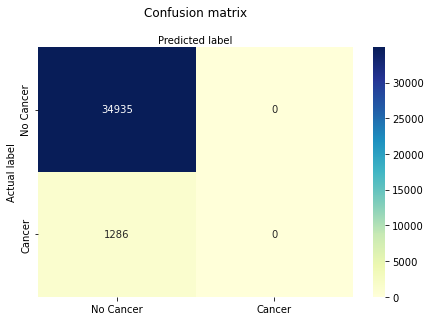

In [92]:
plot_cnf_matrix(cnf_matrix)

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
# Building model with optimal parameters
best_model = GradientBoostingClassifier(n_estimators=450, random_state=0)
best_model.fit(X_train, y_train)
best_model.fit(X_val, y_val)


print("Best Test Accuracy: ", metrics.accuracy_score(y_test, best_model.predict(X_test)))
print("Best Test Precision:", metrics.precision_score(y_test, best_model.predict(X_test)))
print("Best Test Recall:",metrics.recall_score(y_test, best_model.predict(X_test)))
fpr, tpr, thresholds = metrics.roc_curve(y_test, best_model.predict(X_test))
print("Best Test Area Under Curve", metrics.auc(fpr, tpr))

Best Test Accuracy:  0.816984622180503
Best Test Precision: 0.07762845849802372
Best Test Recall: 0.3818040435458787
Best Test Area Under Curve 0.6074040970556072


In [85]:
from sklearn.model_selection import GridSearchCV

g_boost = GradientBoostingClassifier(random_state = 0)

g_boost_params = [{'n_estimators':[150, 200, 250, 300, 400, 450]}]
g_boost_grid = GridSearchCV(g_boost, g_boost_params, cv=10)
g_boost_grid.fit(X_train, y_train)
g_boost_average_score = g_boost_grid.cv_results_['mean_test_score'].astype(float)
result = g_boost_grid.cv_results_
g_boost_grid.best_estimator_

GradientBoostingClassifier(n_estimators=450, random_state=0)

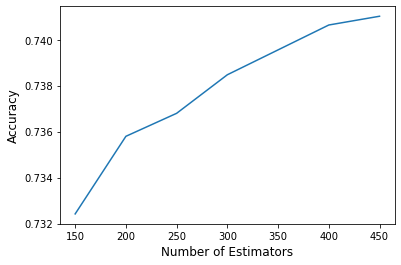

In [91]:
import matplotlib.pyplot as plt

plt.figure()
sns.lineplot(x=[150, 200, 250, 300, 400, 450], y=g_boost_average_score)
plt.ylabel('Accuracy', fontsize = 12)
plt.xlabel('Number of Estimators', fontsize = 12)
plt.show()